In [43]:
!pip install keras


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('Book1.csv')

In [70]:
df

,Contact info,Objectives,Refrees,Skills,Education,Experience,Job level,Score,Good or bad,Final,Job_Lev
0,Found,Found,Found,Found,Found,0.0,Intern,NaN,Good,1,0
1,Found,Found,Found,Found,Not Found,0.0,Intern,NaN,Good,1,0
2,Found,Found,Found,Not Found,Found,0.0,Intern,NaN,Good,1,0
3,Found,Found,Not found,Not Found,Not Found,0.0,Intern,NaN,Good,1,0
4,Found,Found,Not found,Found,Found,0.0,Intern,NaN,Good,1,0
...,...,...,...,...,...,...,...,...,...,...,...
665,Found,Not found,Not found,Found,Found,1.5,Senior,NaN,Bad,0,3
666,Found,Not found,Found,Not Found,Not Found,2.0,Senior,NaN,Bad,0,3
667,Found,Not found,Found,Not Found,Found,2.5,Senior,NaN,Bad,0,3
668,Found,Not found,Found,Found,Not Found,3.0,Senior,NaN,Bad,0,3


In [71]:
df.info

<bound method DataFrame.info of     Contact info Objectives    Refrees     Skills  Education  Experience  \
0          Found      Found      Found      Found      Found         0.0   
1          Found      Found      Found      Found  Not Found         0.0   
2          Found      Found      Found  Not Found      Found         0.0   
3          Found      Found  Not found  Not Found  Not Found         0.0   
4          Found      Found  Not found      Found      Found         0.0   
..           ...        ...        ...        ...        ...         ...   
665        Found  Not found  Not found      Found      Found         1.5   
666        Found  Not found      Found  Not Found  Not Found         2.0   
667        Found  Not found      Found  Not Found      Found         2.5   
668        Found  Not found      Found      Found  Not Found         3.0   
669        Found  Not found  Not found      Found      Found         3.5   

    Job level  Score Good or bad  Final  Job_Lev  
0   

In [72]:
df.dtypes

Contact info     object
Objectives       object
Refrees          object
Skills           object
Education        object
Experience      float64
Job level        object
Score           float64
Good or bad      object
Final             int64
Job_Lev           int64
dtype: object

In [73]:
# Check for null values in each column
null_values_per_column = df.isnull().sum()

# Display the null values in each column
print(null_values_per_column)

Contact info      0
Objectives        0
Refrees           0
Skills            0
Education         0
Experience        0
Job level         0
Score           670
Good or bad       0
Final             0
Job_Lev           0
dtype: int64


In [74]:
# Shuffle the rows
shuffled_df = df.sample(frac=1, random_state=42)

# Reset the index of the shuffled DataFrame
shuffled_df.reset_index(drop=True, inplace=True)

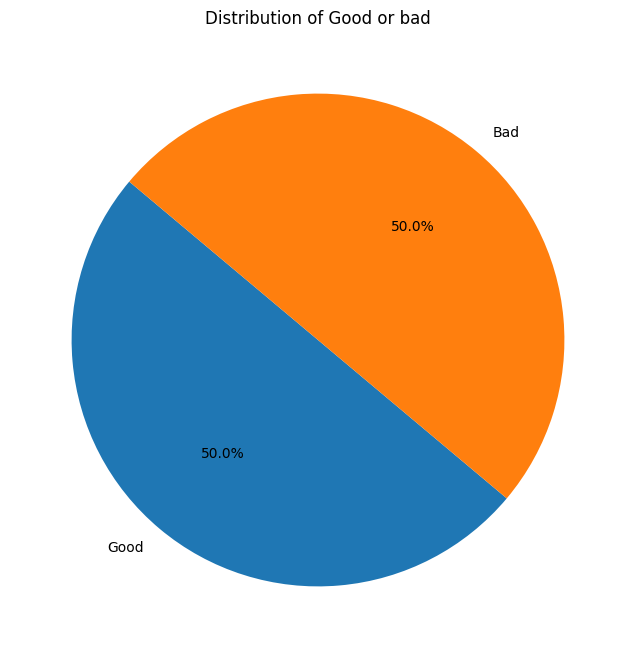

In [75]:
# Specify the column you want to visualize in the pie chart
column_to_plot = 'Good or bad'

# Count the occurrences of unique values in the specified column
value_counts = df[column_to_plot].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {column_to_plot}')

# Show the pie chart
plt.show()

In [76]:
from sklearn.model_selection import train_test_split

# Specify the features (X) and the target (y) column
X = df[['Experience', 'Job_Lev']]  # Replace 'target_column_name' with the actual column name
y = df['Final']

# Split the data into training and testing sets (e.g., 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define a Sequential model
model = keras.Sequential()

# Add input layer
model.add(layers.Input(shape=(2,)))  # 2 feature variables

# Add one or more hidden layers (customize these as needed)
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

num_classes = 2
# Add output layer with the appropriate number of classes (replace 'num_classes')
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
17/17 [==============================] - 4s 39ms/step - loss: 0.7417 - accuracy: 0.4310 - val_loss: 0.6506 - val_accuracy: 0.7239
Epoch 2/10
17/17 [==============================] - 0s 5ms/step - loss: 0.6582 - accuracy: 0.6213 - val_loss: 0.6058 - val_accuracy: 0.7239
Epoch 3/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6295 - accuracy: 0.6213 - val_loss: 0.5792 - val_accuracy: 0.7239
Epoch 4/10
17/17 [==============================] - 0s 6ms/step - loss: 0.6080 - accuracy: 0.6287 - val_loss: 0.5631 - val_accuracy: 0.7612
Epoch 5/10
17/17 [==============================] - 0s 4ms/step - loss: 0.5866 - accuracy: 0.6772 - val_loss: 0.5349 - val_accuracy: 0.7910
Epoch 6/10
17/17 [==============================] - 0s 5ms/step - loss: 0.5661 - accuracy: 0.7276 - val_loss: 0.5125 - val_accuracy: 0.8134
Epoch 7/10
17/17 [==============================] - 0s 5ms/step - loss: 0.5440 - accuracy: 0.7705 - val_loss: 0.4928 - val_accuracy: 0.8582
Epoch 8/10
17/17 [=

5/5 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.8657
Test Accuracy: 0.8656716346740723
Test Loss: 0.43985143303871155


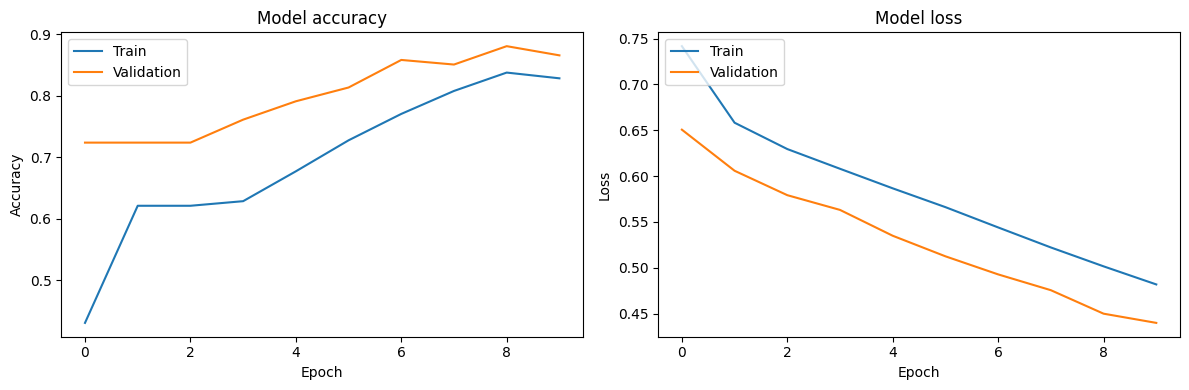

In [80]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

# Plot training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [81]:
from tensorflow import keras

# Assuming 'model' is your Keras neural network model
model.save('Reviewer.h5')

f:\Python projects\charya\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
